In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import xgboost as xgb
import pickle

In [2]:
data = pd.read_csv ('ot.csv',sep=',',dtype= np.float64)
feat_labels=data.columns.values.tolist()[1:-1]

In [3]:
data.dropna(inplace=True)

In [4]:
data=np.array(data)
print(data.shape)

(3719, 122)


In [17]:
X = data[:, 1:121]
Y = data[:, 121]

X = np.array(X)
Y = np.array(Y)

In [7]:
xtrain, xtest, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3)

In [8]:
#Scaling of data
SS = preprocessing.StandardScaler()
xtrain = SS.fit_transform(xtrain)
xtest = SS.transform (xtest)

In [14]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': (5, 10, 50, 100, 500, 1000), 'max_features': ('auto', 'sqrt', 'log2'), 'criterion': ('mse', 'mae')}
RF = model_selection.GridSearchCV(ensemble.RandomForestRegressor(),parameter, cv=5, n_jobs=-1)
RF.fit(xtrain, trainY)
    
RFtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, RF.predict(xtest)))
RFtest_r2  = metrics.r2_score(testY, RF.predict(xtest))
RFtest_mae  = metrics.mean_absolute_error(testY, RF.predict(xtest))
    
RMSE.append(RFtest_rmse)  
R2.append(RFtest_r2)
MAE.append(RFtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(RF.best_params_)

RMSE:  7.698710345801531 R2:  0.9223762035554732 MAE:  5.018422831541234
{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 1000}


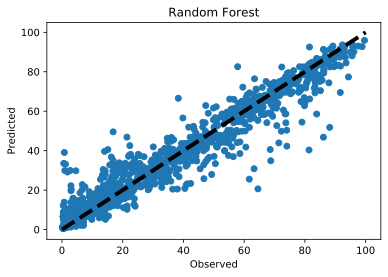

In [16]:
fig, ax = plt.subplots()
ax.scatter(testY, RF.predict(xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest')
plt.savefig("RandomForest.eps", format="eps")
plt.savefig("RandomForest.jpg", format="jpg")
plt.show()

In [17]:
with open('RF.pickle', "wb") as f:
    pickle.dump(RF, f)

In [18]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': (5, 10, 50, 100, 500, 1000), 'loss': ('ls', 'lad', 'quantile', 'huber'), 
             'learning_rate':(0.001, 0.01, 0.05, 0.1, 0.3,0.5, 1.0), 'criterion': ('friedman_mse','mse', 'mae'), 
             'min_samples_split': (2, 3), 'max_depth': (5, 10, 20, 50), 'max_features': ('auto', 'sqrt', 'log2')}
GB = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(),parameter, cv=5, n_jobs=-1)
GB.fit(xtrain, trainY)
    
GBtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GB.predict(xtest)))
GBtest_r2  = metrics.r2_score(testY, GB.predict(xtest))
GBtest_mae  = metrics.mean_absolute_error(testY, GB.predict(xtest))
    
RMSE.append(GBtest_rmse)  
R2.append(GBtest_r2)
MAE.append(GBtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GB.best_params_)

C:\Users\opetinrin2\AppData\Local\Continuum\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RMSE:  6.547976422424403 R2:  0.9438469780825015 MAE:  4.3445287124890095
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 1000}


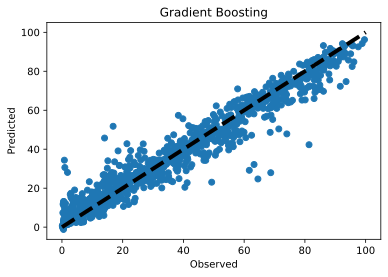

In [19]:
fig, ax = plt.subplots()
ax.scatter(testY, GB.predict(xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gradient Boosting')
plt.savefig("GradientBoosting.eps", format="eps")
plt.savefig("GradientBoosting.jpg", format="jpg")
plt.show()

In [20]:
with open('GB.pickle', "wb") as f:
    pickle.dump(GB, f)

In [8]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [100, 1000], 'loss': ['linear', 'square', 'exponential'], 'learning_rate':[1.0, 5.0, 10.0]}
AB = model_selection.GridSearchCV(ensemble.AdaBoostRegressor(),parameter, cv=5, n_jobs=-1)
AB.fit(xtrain, trainY)
    
ABtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, AB.predict(xtest)))
ABtest_r2  = metrics.r2_score(testY, AB.predict(xtest))
ABtest_mae  = metrics.mean_absolute_error(testY, AB.predict(xtest))
    
RMSE.append(ABtest_rmse)  
R2.append(ABtest_r2)
MAE.append(ABtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(AB.best_params_)
print(list(RMSE))

RMSE:  14.737720440401848 R2:  0.7155410861279916 MAE:  12.382163041621112
{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 1000}
[14.737720440401848]


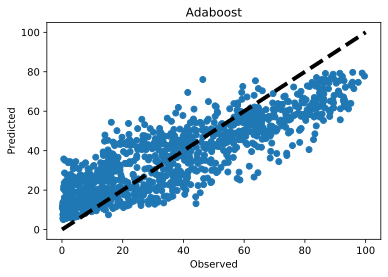

In [9]:
fig, ax = plt.subplots()
ax.scatter(testY, AB.predict(xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Adaboost')
plt.savefig("Adaboost.eps", format="eps")
plt.savefig("Adaboost.jpg", format="jpg")
plt.show()

In [10]:
with open('AB.pickle', "wb") as f:
    pickle.dump(AB, f)

In [11]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': [100, 1000], 'max_samples': [500, 1000, 1500], 'max_features': [50, 75, 100]}
BG = model_selection.GridSearchCV(ensemble.BaggingRegressor(),parameter, cv=5, n_jobs=-1)
BG.fit(xtrain, trainY)
    
BGtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, BG.predict(xtest)))
BGtest_r2  = metrics.r2_score(testY, BG.predict(xtest))
BGtest_mae  = metrics.mean_absolute_error(testY, BG.predict(xtest))
    
RMSE.append(BGtest_rmse)  
R2.append(BGtest_r2)
MAE.append(BGtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(BG.best_params_)

RMSE:  8.259536118104878 R2:  0.910655004256834 MAE:  5.538887166965363
{'max_features': 50, 'max_samples': 1500, 'n_estimators': 1000}


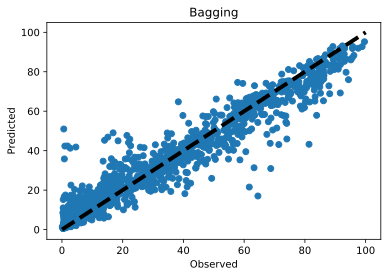

In [12]:
fig, ax = plt.subplots()
ax.scatter(testY, BG.predict(xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Bagging')
plt.savefig("Bagging.eps", format="eps")
plt.savefig("Bagging.jpg", format="jpg")
plt.show()

In [13]:
with open('BG.pickle', "wb") as f:
    pickle.dump(BG, f)

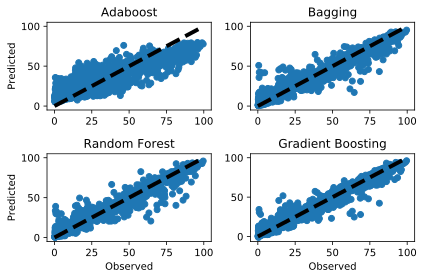

In [35]:
#plt.figure(1, figsize = 30,16)
#plt.subplot(221)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(testY, AB.predict(xtest))
ax[0,0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
#ax[0,0].set_xlabel('Observed')
ax[0,0].set_ylabel('Predicted')
ax[0,0].set_title('Adaboost')

#plt.subplot(222)
#fig, ax = plt.subplots()
ax[0,1].scatter(testY, BG.predict(xtest))
ax[0,1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
#ax[0,1].set_xlabel('Observed')
#ax[0,1].set_ylabel('Predicted')
ax[0,1].set_title('Bagging')

#plt.subplot(223)
#fig, ax = plt.subplots()
ax[1,0].scatter(testY, RF.predict(xtest))
ax[1,0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax[1,0].set_xlabel('Observed')
ax[1,0].set_ylabel('Predicted')
ax[1,0].set_title('Random Forest')

#plt.subplot(224)
#fig, ax = plt.subplots()
ax[1,1].scatter(testY, GB.predict(xtest))
ax[1,1].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax[1,1].set_xlabel('Observed')
#ax[1,1].set_ylabel('Predicted')
ax[1,1].set_title('Gradient Boosting')

fig.tight_layout()
plt.savefig("All.eps", format="eps")
plt.savefig("All.jpg", format="jpg", dpi = 300)    
plt.show()

In [9]:
clf = ensemble.RandomForestRegressor(n_estimators=1000, max_features = 'auto', criterion = 'mae', n_jobs=-1)
clf.fit(xtrain, trainY)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

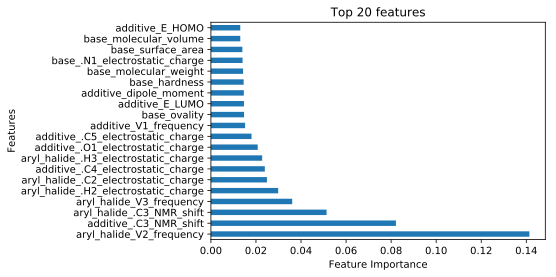

In [10]:
feat_importances = pd.Series(clf.feature_importances_, index=feat_labels)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 features')
plt.savefig('20 top FS.jpg', format ='jpg', dpi =300, bbox_inches="tight")
plt.show()

In [40]:
sfm = feature_selection.SelectFromModel(clf, threshold=0.002)
sfm.fit(xtrain, trainY)
X_important_train = sfm.transform(xtrain)
X_important_test = sfm.transform(xtest)

In [41]:
parameters = {'n_estimators': [1000], 'loss': ['ls'], 'learning_rate': [0.01],
              'criterion': ['friedman_mse'], 'min_samples_split': [3], 'max_depth': [10],
              'max_features': ['sqrt']}

clf_important = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(), parameters, cv=5, n_jobs=-1)
clf_important.fit(X_important_train, trainY)
pred = clf_important.predict(X_important_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(testY, pred)))
print('R2: ', metrics.r2_score(testY, pred))
print('MAE: ', metrics.mean_absolute_error(testY, pred))

RMSE:  6.362248747259691
R2:  0.9469872652077441
MAE:  4.253321161181417


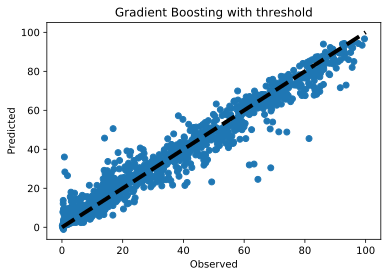

In [43]:
fig, ax = plt.subplots()
ax.scatter(testY, pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Gradient Boosting with threshold')
plt.savefig("Threshold_0002.eps", format="eps")
plt.savefig("Threshold_0002.jpg", format="jpg", dpi =300)
plt.show()

In [5]:
#without ligands
X = data[:, 1:57]
Y = data[:, 121]

X = np.array(X)
Y = np.array(Y)

In [7]:
xtrain, xtest, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3)

In [8]:
#Scaling of data
SS = preprocessing.StandardScaler()
xtrain = SS.fit_transform(xtrain)
xtest = SS.transform (xtest)

In [ ]:
RMSE = []
R2 = []
MAE = []
    
parameter = {'n_estimators': (5, 10, 50, 100, 500, 1000), 'loss': ('ls', 'lad', 'quantile', 'huber'), 
             'learning_rate':(0.001, 0.01, 0.05, 0.1, 0.3,0.5, 1.0), 'criterion': ('friedman_mse','mse', 'mae'), 
             'min_samples_split': (2, 3), 'max_depth': (5, 10, 20, 50), 'max_features': ('auto', 'sqrt', 'log2')}
GB = model_selection.GridSearchCV(ensemble.GradientBoostingRegressor(),parameter, cv=5, n_jobs=-1)
GB.fit(xtrain, trainY)
    
GBtest_rmse  = np.sqrt(metrics.mean_squared_error(testY, GB.predict(xtest)))
GBtest_r2  = metrics.r2_score(testY, GB.predict(xtest))
GBtest_mae  = metrics.mean_absolute_error(testY, GB.predict(xtest))
    
RMSE.append(GBtest_rmse)  
R2.append(GBtest_r2)
MAE.append(GBtest_mae)
    
print('RMSE: ', min(RMSE), 'R2: ', max(R2), 'MAE: ', min(MAE))
print(GB.best_params_)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(testY, GB.predict(xtest))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4,)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title('Without ligands')
plt.savefig("No Lig.eps", format="eps")
plt.savefig("No Lig.jpg", format="jpg")
plt.show()